Example 7 - Hydrodinamic Bearings
=====
In this example, we use the rotor seen in Example 5.9.6 from 'Dynamics of Rotating Machinery' by MI Friswell, JET Penny, SD Garvey & AW Lees, published by Cambridge University Press, 2010.

Same rotor of Example 3, but the bearings are replaced with hydrodynamic bearings. In order to instantiate them, rather than giving the stiffness and damping data, we will calculate them using their hydrodinamic data, as provided by Example 5.5.1 from the book: The oil-film bearings have a diameter of 100 mm, are 30 mm long, and each supports a static load of 525 N, which represents half of the weight of the rotor. The radial clearance in the bearings is 0.1 mm and the oil film has a viscosity of 0.1 Pa s.


In [1]:
from bokeh.io import output_notebook
import ross as rs
import numpy as np
output_notebook()


Loading BokehJS ...

/home/flaviorangel/anaconda3/envs/ross/lib/python3.6/site-packages/ross/fluid_flow/fluid_flow.py:518: UserWarning: Function calculate_eccentricity_ratio suitable only for short bearings. The ratio between the bearing length and its radius should be less or equal to 0.25. Currently we have 0.6.
  + "."
/home/flaviorangel/anaconda3/envs/ross/lib/python3.6/site-packages/ross/fluid_flow/fluid_flow.py:582: UserWarning: Function get_analytical_damping_matrix suitable only for short bearings. The ratio between the bearing length and its radius should be less or equal to 0.25. Currently we have 0.6.
  + "."
/home/flaviorangel/anaconda3/envs/ross/lib/python3.6/site-packages/ross/fluid_flow/fluid_flow.py:464: UserWarning: Function get_rotor_load suitable only for short bearings. The ratio between the bearing length and its radius should be less or equal to 0.25. Currently we have 0.6.
  + "."
/home/flaviorangel/anaconda3/envs/ross/lib/python3.6/site-packages/ross/fluid_flow/fluid_flow.py:548: Us

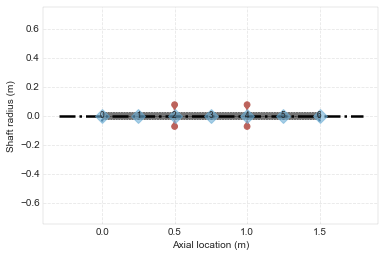

In [2]:
# Classic Instantiation of the rotor
shaft_elements = []
bearing_seal_elements = []
disk_elements = []
Steel = rs.materials. steel
for i in range(6):
    shaft_elements.append(rs.ShaftElement(L=0.25, material=Steel, n=i, i_d=0, o_d=0.05))

disk_elements.append(rs.DiskElement.from_geometry(n=2,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.28
                                                  )
                     )

disk_elements.append(rs.DiskElement.from_geometry(n=4,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.35
                                                  )
                     )

bearing_seal_elements.append(rs.BearingElement.from_fluid_flow(n=0, nz=30, ntheta=20, nradius=11,
                                                               length=0.03, omega=157.1, p_in=0,
                                                               p_out=0, radius_rotor=0.0499,
                                                               radius_stator=0.05, visc=0.1,
                                                               rho=860., load=525))
bearing_seal_elements.append(rs.BearingElement.from_fluid_flow(n=6, nz=30, ntheta=20, nradius=11,
                                                               length=0.03, omega=157.1, p_in=0,
                                                               p_out=0, radius_rotor=0.0499,
                                                               radius_stator=0.05, visc=0.1,
                                                               rho=860., load=525))

rotor596c = rs.Rotor(shaft_elements=shaft_elements,
                     bearing_seal_elements=bearing_seal_elements,
                     disk_elements=disk_elements, n_eigen=12)

rotor596c.plot_rotor()


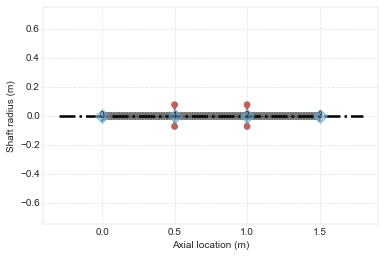

In [3]:
# From_section class method instantiation
bearing_seal_elements = []
disk_elements = []
shaft_length_data = 3*[0.5]
i_d = 3*[0]
o_d = 3*[0.05]

disk_elements.append(rs.DiskElement.from_geometry(n=1,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.28
                                                  )
                    )

disk_elements.append(rs.DiskElement.from_geometry(n=2,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.35
                                                  )
                     )
bearing_seal_elements.append(rs.BearingElement(n=0, kxx=1e6, kyy=1e6, cxx=3e3, cyy=3e3))
bearing_seal_elements.append(rs.BearingElement(n=3, kxx=1e6, kyy=1e6, cxx=3e3, cyy=3e3))

rotor596fs = rs.Rotor.from_section(brg_seal_data=bearing_seal_elements,
                                   disk_data=disk_elements, leng_data=shaft_length_data,
                                   i_ds_data=i_d,o_ds_data=o_d
                                   )
rotor596fs.plot_rotor()


In [4]:
# Obtaining results for w = 200 rpm 
rotor596c.w = 200*np.pi/30
rotor596fs.w = 200*np.pi/30

print('Normal Instantiation =', rotor596c.wn/(2*np.pi), '[Hz]')
print('\n')
print('From Section Instantiation =', rotor596fs.wn/(2*np.pi), '[Hz]')


Normal Instantiation = [1.73108570e-03 1.73108714e-03 1.76540732e+01 1.77044354e+01
 6.93663844e+01 6.95687817e+01] [Hz]


From Section Instantiation = [ 13.89569397  13.9153662   47.97597062  48.40830101 136.87265681
 135.61510191] [Hz]


In [5]:
# Obtaining results for w=4000RPM 

rotor596c.w = 4000*np.pi/30

print('Normal Instantiation =', rotor596c.wn/(2*np.pi))


Normal Instantiation = [1.73105804e-03 1.73108714e-03 1.71209738e+01 1.82032508e+01
 6.70984963e+01 7.13507303e+01]


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f36b4b4e240>)

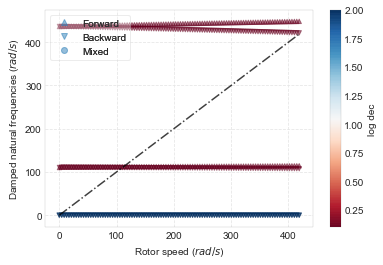

In [6]:
rotor596c.run_campbell(np.linspace(0, 4000*np.pi/30, 100)).plot()
